In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, ParameterGrid, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix
from pyearth import Earth
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('us_used_cars_final.csv')
data.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,5LMCJ2C97HUL71203,36.8 in,SUV / Crossover,Devine,21.0,40,78016,*We have 19 sources of financing and second ch...,I4,2000.0,...,"270 lb-ft @ 3,000 RPM",A,Automatic,t66989,Select FWD,FWD,Front-Wheel Drive,105.9 in,84.1 in,2017
1,1FM5K8D87HGE07214,39.5 in,SUV / Crossover,Buffalo,16.0,9,55313,We are open for business. Purchase your nex...,V6,3500.0,...,"255 lb-ft @ 4,000 RPM",A,6-Speed Automatic,t67141,XLT AWD,AWD,All-Wheel Drive,112.8 in,90.2 in,2017
2,1FMCU0GX6FUA14602,36.8 in,SUV / Crossover,Murfreesboro,23.0,30,37129,CARFAX One-Owner.THIS VEHICLE HAS GONE THROUGH...,I4,2500.0,...,"170 lb-ft @ 4,500 RPM",A,Automatic,t55391,SE FWD,FWD,Front-Wheel Drive,105.9 in,81.8 in,2015
3,WBA4W7C56JAB87837,33.7 in,Coupe,San Rafael,21.0,45,94901,FUEL EFFICIENT 32 MPG Hwy/21 MPG City! CARFAX ...,I6,3000.0,...,"330 lb-ft @ 1,380 RPM",A,8-Speed Automatic,t73244,440i Coupe RWD,RWD,Rear-Wheel Drive,110.6 in,79.4 in,2018
4,SADCL2GX4KA397815,37.2 in,SUV / Crossover,Glen Cove,22.0,319,11542,Santorini Black 2019 Jaguar F-PACE 30t R-Sport...,I4,2000.0,...,"295 lb-ft @ 1,500 RPM",A,8-Speed Automatic,t83299,30t R-Sport AWD,AWD,All-Wheel Drive,113.1 in,85.6 in,2019


EDA & Data Viz (completed by hiba)

In [3]:
# data types for all columns 
data_types = pd.DataFrame(data.dtypes)
data_types[0].value_counts()

object     33
float64    11
bool        8
int64       5
Name: 0, dtype: int64

In [4]:
data.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,year
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,21.064333,45.114333,50305.630833,2959.166667,28.460667,249.092167,37.240227,2.779022e+08,-90.394026,45099.504500,1.317667,24568.383500,1066.323500,4.268644,209583.667000,2016.812667
std,4.568115,68.868636,26739.061772,1133.912224,5.460869,82.798315,4.977101,5.683748e+06,13.470080,35797.272393,0.646135,16744.392283,1045.426374,0.500819,130166.298871,2.653943
min,11.000000,0.000000,1020.000000,1000.000000,15.000000,78.000000,25.481300,1.622947e+08,-123.197000,10.000000,1.000000,1680.000000,0.000000,1.000000,41593.000000,1993.000000
25%,17.000000,13.000000,30076.000000,2000.000000,24.000000,180.000000,33.606625,2.772000e+08,-96.763100,22090.750000,1.000000,16500.000000,327.000000,4.030303,60592.000000,2016.000000
50%,21.000000,27.000000,48197.000000,2500.000000,28.000000,248.000000,38.410100,2.792906e+08,-87.470300,34645.000000,1.000000,21924.000000,781.000000,4.347826,276221.000000,2017.000000
75%,25.000000,51.000000,75237.000000,3600.000000,32.000000,295.000000,41.101500,2.806469e+08,-80.826500,56661.250000,1.000000,29995.000000,1499.250000,4.600000,307550.000000,2019.000000
max,70.000000,1365.000000,99362.000000,6600.000000,75.000000,707.000000,48.304300,2.819634e+08,-68.411600,294140.000000,8.000000,859000.000000,12039.000000,5.000000,440352.000000,2020.000000


#### drop columns that are a unique ID
1. vin: Type String. Vehicle Identification Number is a unique encoded string for every vehicle. 
2. listing_id: Unique Type Integer. Listing id from the website
3. main_picture_url: Type String.

In [5]:
data.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'main_picture_url', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [6]:
data.drop(columns = ['vin', 'listing_id', 'main_picture_url', 'description'], inplace = True)

In [7]:
data.drop(columns = ['franchise_dealer'], inplace = True)
# franchise dealer is all True; has no variance; removed bc its a constant feature. 

### Feature engineering
(completed by hiba)

In [8]:
# map 
print(data.wheel_system.unique())
print(data.transmission.unique())

['FWD' 'AWD' 'RWD' '4WD' '4X2']
['A' 'CVT' 'M' 'Dual Clutch']


In [9]:
bool_cols = data.dtypes[data.dtypes == bool]

In [10]:
bool_cols = pd.DataFrame(bool_cols).reset_index()
bool_cols = bool_cols['index']
bool_cols = list(bool_cols)
bool_cols

['fleet',
 'frame_damaged',
 'has_accidents',
 'isCab',
 'is_new',
 'salvage',
 'theft_title']

In [11]:
for col in bool_cols:
    data[col] = data[col].map({False: 0, True: 1})

In [12]:
cols_map = []
for c in data.columns:
    col_len = (len(data[c].unique()))
    if col_len <=5:
        cols_map.append(c)
[cols_map.remove(c) for c in bool_cols]

[None, None, None, None, None, None, None]

In [13]:
cols_map

['fuel_type', 'transmission', 'wheel_system', 'wheel_system_display']

In [14]:
# # use label encoder
le = LabelEncoder()

encoder_dict = {key: None for key in cols_map}
for c in cols_map:
    encoder_dict[c] = data[c].unique()
    col_name = str(c)+"_cat"
    data[col_name] = le.fit_transform(data[c])
    encoder_dict[col_name] = le.fit_transform(encoder_dict[c])

### Use the encoder dictionary to create dummy data of the selected columns in the dataframe
(completed by hiba)

In [15]:
encoder_dict

{'fuel_type': array(['Gasoline', 'Diesel', 'Flex Fuel Vehicle', 'Biodiesel', 'Hybrid'],
       dtype=object),
 'transmission': array(['A', 'CVT', 'M', 'Dual Clutch'], dtype=object),
 'wheel_system': array(['FWD', 'AWD', 'RWD', '4WD', '4X2'], dtype=object),
 'wheel_system_display': array(['Front-Wheel Drive', 'All-Wheel Drive', 'Rear-Wheel Drive',
        'Four-Wheel Drive', '4X2'], dtype=object),
 'fuel_type_cat': array([3, 1, 2, 0, 4]),
 'transmission_cat': array([0, 1, 3, 2]),
 'wheel_system_cat': array([3, 2, 4, 0, 1]),
 'wheel_system_display_cat': array([3, 1, 4, 2, 0])}

In [16]:
# back_legroom, wheelbase, width, front_legroom,, height,  length, maximum_seating, fuel_tank_volume,
# power, torque

data['back_legroom'] = data['back_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))

In [17]:
data['front_legroom'] = data['front_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['width'] = data['width'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['height'] = data['height'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['length'] = data['length'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['wheelbase'] = data['wheelbase'].map(lambda x: x.lstrip('+-').rstrip('in'))

In [18]:
data['maximum_seating'] = data['maximum_seating'].map(lambda x: x.lstrip('+-').rstrip('seating'))

In [19]:
data['fuel_tank_volume'] = data['fuel_tank_volume'].map(lambda x: x.lstrip('+-').rstrip('gal'))

In [20]:
# power and torque
data['power'] = data['power'].str[:3]
data['torque'] = data['torque'].str[:3]

In [21]:
data.power = pd.to_numeric(data.power)
data.back_legroom = pd.to_numeric(data.back_legroom)
data.front_legroom = pd.to_numeric(data.front_legroom)
data.width = pd.to_numeric(data.width)
data.height = pd.to_numeric(data.height)
data.length = pd.to_numeric(data.length)
data.wheelbase = pd.to_numeric(data.wheelbase)
data.maximum_seating = pd.to_numeric(data.maximum_seating)
data.fuel_tank_volume = pd.to_numeric(data.fuel_tank_volume)
data.torque = pd.to_numeric(data.torque)

In [22]:
corr_table = pd.DataFrame(data.corrwith(data.price)).sort_values(by = 0, ascending = False).reset_index()

In [23]:
highest_corr_numerical = list(corr_table.loc[(corr_table[0] >=  0.2) | (corr_table[0] <= -0.2)]['index'])[1:]
highest_corr_numerical

['horsepower',
 'power',
 'torque',
 'engine_displacement',
 'fuel_tank_volume',
 'wheelbase',
 'year',
 'length',
 'width',
 'savings_amount',
 'height',
 'wheel_system_cat',
 'city_fuel_economy',
 'mileage',
 'highway_fuel_economy']

### Data Viz 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


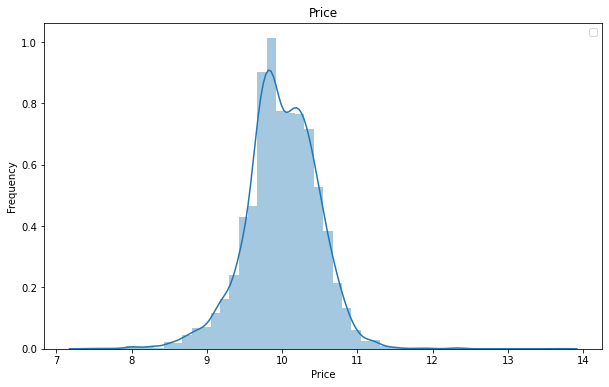

In [24]:
### this graph is from Kaggle; I didn't write the code for it.
viz = data.copy()
viz['price'] = np.log(viz['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(viz['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### Variance w independent variable (only applicable to numerical data) (completed by Hiba)
Use VarianceTreshold from sklearn to remove constant and quasi constant numerical predictors from the dataset

In [25]:
X_numerical = data.copy()
for col in X_numerical.columns:
    if col not in highest_corr_numerical:
        X_numerical.drop(col, axis = 1, inplace = True)

y = data.price

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size = 0.25, random_state = 45)

In [26]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_numerical)
constant_predictors = [x for x in X_numerical.columns if x not in X_numerical.columns[sel.get_support()]]
print(len(constant_predictors), "total constant predictors, with a variance of 0")

0 total constant predictors, with a variance of 0


#### There are 0 constant predictors :(

In [27]:
X_numerical.columns

Index(['city_fuel_economy', 'engine_displacement', 'fuel_tank_volume',
       'height', 'highway_fuel_economy', 'horsepower', 'length', 'mileage',
       'power', 'savings_amount', 'torque', 'wheelbase', 'width', 'year',
       'wheel_system_cat'],
      dtype='object')

### Data Viz (only numerical predictors) (completed by hiba)

In [77]:
fig, axes = plt.subplots(3,5,figsize=(20,15))

plt.xticks(rotation=90, ha='right')
axes[0][0].bar(X_numerical.city_fuel_economy, y)
plt.xticks(rotation=90, ha='right')
axes[0][1].bar(X_numerical.engine_displacement, y)
axes[0][2].bar(X_numerical.fuel_tank_volume, y)
axes[0][2].bar(X_numerical.highway_fuel_economy, y)
axes[0][2].bar(X_numerical.height, y)

axes[1][0].bar(X_numerical.horsepower, y)
axes[1][1].bar(X_numerical.length, y)
axes[1][2].bar(X_numerical.mileage, y)
axes[1][3].bar(X_numerical.power, y)
axes[1][4].bar(X_numerical.savings_amount, y)

axes[2][0].bar(X_numerical.torque, y)
axes[2][1].bar(X_numerical.wheelbase, y)
axes[2][2].bar(X_numerical.width, y)
axes[2][3].bar(X_numerical.year, y)
axes[2][4].bar(X_numerical.wheel_system_cat, y)

In [29]:
data.columns

Index(['back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type', 'exterior_color', 'fleet', 'frame_damaged',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'highway_fuel_economy', 'horsepower',
       'interior_color', 'isCab', 'is_new', 'latitude', 'length',
       'listed_date', 'listing_color', 'longitude', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year', 'fuel_type_cat',
       'transmission_cat', 'wheel_system_cat', 'wheel_system_display_cat'],
      dtype='object')

### Data Viz (only categorical predictors) (completed by emily)

# fuel_type, transmission, wheel system, wheel_system_display

In [30]:
data_2 = data.copy()
# make seperate df to just look at categorical
o_data = data.drop(columns = ["back_legroom", "wheel_system_display", "wheelbase", "width", "front_legroom", 
                              "fuel_tank_volume", "height", "torque", "maximum_seating","transmission_cat",
                              "power","city_fuel_economy","daysonmarket","dealer_zip","transmission","wheel_system_display_cat",
                              "fuel_type_cat","wheel_system","wheel_system_cat","fuel_type",
                              "engine_displacement","fleet","frame_damaged","has_accidents","highway_fuel_economy",
                              "horsepower","isCab","is_new","latitude","longitude","mileage","owner_count","salvage",
                              "savings_amount","seller_rating","sp_id","theft_title","year"], axis = 1)
# taken out: "franchise_dealer"
cols = o_data.columns
name = []
unique_value = []
for i in range(0,len(cols)):
    c = cols[i]
    unique = len(data[c].unique())
    unique_value.append(unique)
    name.append(c)

In [31]:
# Create the pandas DataFrame with object columns and their unique values
data_ = {'column': name, 'unique_values':unique_value}
o_unique_values_count = pd.DataFrame(data_)
o_unique_values_count.sort_values(by=['unique_values'])

,column,unique_values
0,body_type,9
9,listing_color,14
2,engine_cylinders,20
3,engine_type,20
15,transmission_display,21
5,franchise_make,40
11,make_name,42
8,listed_date,321
12,model_name,361
7,length,384


From this information, we can simply visualize with boxplot any variables until make_name, to see their relevance and adjust them. After that we will look more thoroughly, maybe group data. Consider dropping anything with other 1000 unique values as we only have 6000 rows, so might not be good predictors, but will decide on case by case basis.

#### body_type

[]

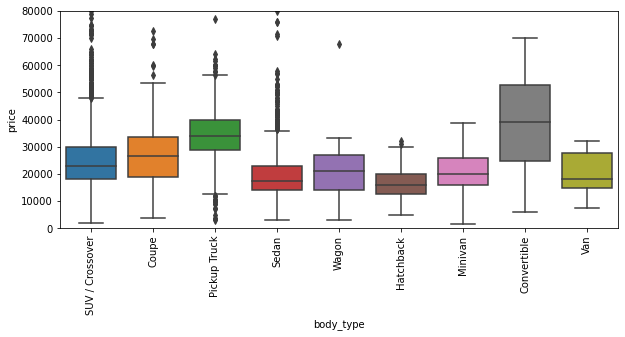

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(x="body_type",y="price", data = data)
plt.xticks(rotation=90)
plt.ylim(0,80000)

plt.plot()

Do seem to have a significant trend right away, check value counts to see if some types are more common than others

In [33]:
data.body_type.value_counts()

SUV / Crossover    3041
Sedan              1655
Pickup Truck        642
Minivan             206
Coupe               146
Wagon               124
Hatchback           110
Convertible          63
Van                  13
Name: body_type, dtype: int64

Have enough observations for each value to be valid, none of the smaller groups stand out substantially, convertible is a little bit spread but that should be fine -> convert to dummies

In [34]:
# change spelling so colummns will be callable
data_2['body_type'] = o_data['body_type'].apply(lambda x: 'SUV_Crossover' if x == 'SUV / Crossover' else 
                                                          'Pickup_Truck' if x == 'Pickup Truck' else
                                                x)
# get dummies
data_2 = pd.get_dummies(data_2, columns=['body_type'], drop_first=True)

#### listing_color

[]

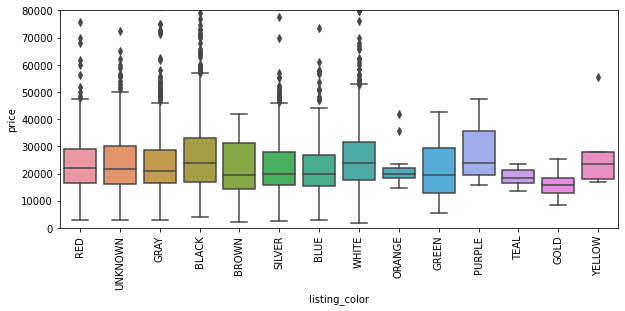

In [35]:
# boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x="listing_color",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

In [36]:
o_data.listing_color.value_counts()

WHITE      1252
BLACK      1209
SILVER      865
GRAY        808
UNKNOWN     746
RED         509
BLUE        484
GREEN        40
BROWN        35
ORANGE       21
TEAL         11
GOLD          8
PURPLE        7
YELLOW        5
Name: listing_color, dtype: int64

Very little variance in colour mean is basically constant range varies a bit but I would consider disregarding this variable.
Especially the few that stand out a little (like gold or teal) have the lowest value counts, and therefore say a lot less.

-> drop column

In [37]:
data_2 = data_2.drop(columns=["listing_color"], axis = 1)

#### engine_cyliners

[]

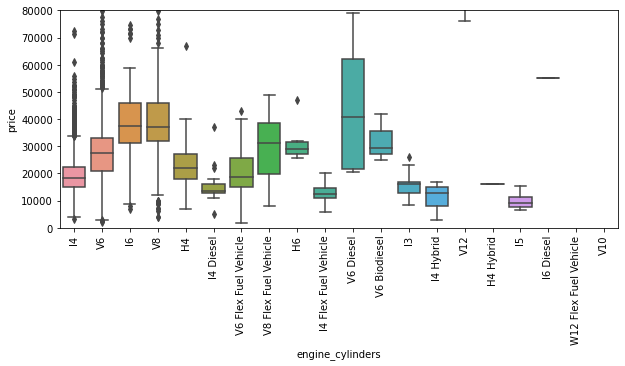

In [38]:
plt.figure(figsize=(10,4))

sns.boxplot(x="engine_cylinders",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

In [39]:
o_data.engine_cylinders.value_counts()

I4                       2985
V6                       1905
V8                        527
V6 Flex Fuel Vehicle      183
H4                        161
V8 Flex Fuel Vehicle       96
I6                         56
I4 Flex Fuel Vehicle       22
I4 Diesel                  17
I3                         13
V6 Diesel                   8
H6                          7
V6 Biodiesel                5
I5                          4
I4 Hybrid                   3
V12                         3
V10                         2
H4 Hybrid                   1
I6 Diesel                   1
W12 Flex Fuel Vehicle       1
Name: engine_cylinders, dtype: int64

Turn anything under 100 observations into 'other', if there is only one observation this is not useful data.

In [40]:
data_2['engine_cylinders'] = o_data['engine_cylinders'].apply(lambda x: 'I4' if x == 'I4' else 
                                                          'V6' if x == 'V6' else
                                                          'V8' if x == 'V8' else
                                                          'V6_Flex_Fuel_Vehicle' if x == 'V6 Flex Fuel Vehicle' else
                                                          'H4' if x == 'H4' else
                                                          'other')
data_2.engine_cylinders.value_counts()

I4                      2985
V6                      1905
V8                       527
other                    239
V6_Flex_Fuel_Vehicle     183
H4                       161
Name: engine_cylinders, dtype: int64

[]

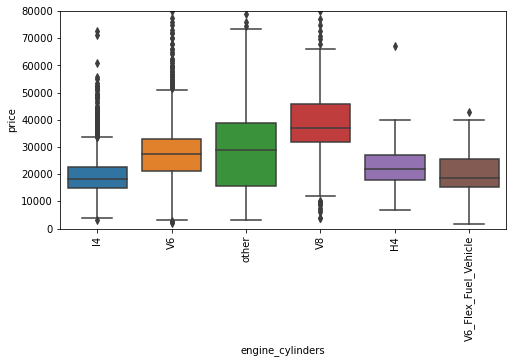

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(x="engine_cylinders",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Other is naturally with bigger range, but this looks better, get dummies for it:

In [42]:
data_2 = pd.get_dummies(data_2, columns=['engine_cylinders'], drop_first=True)

#### engine_type

[]

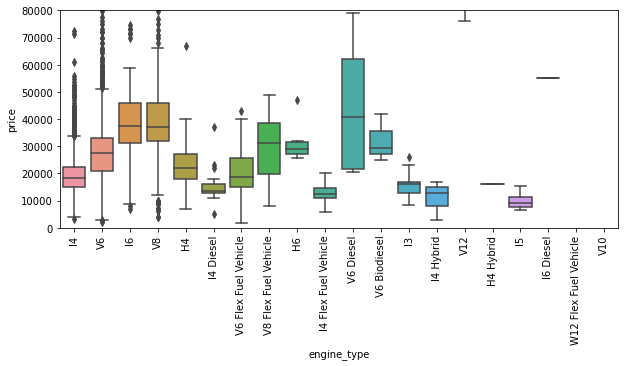

In [43]:
plt.figure(figsize=(10,4))
sns.boxplot(x="engine_type",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Exactly the same distributions and values as in engine_cylinders, can be dropped.

In [44]:
data_2 = data_2.drop(columns=["engine_type"], axis = 1)

#### transmission_display

[]

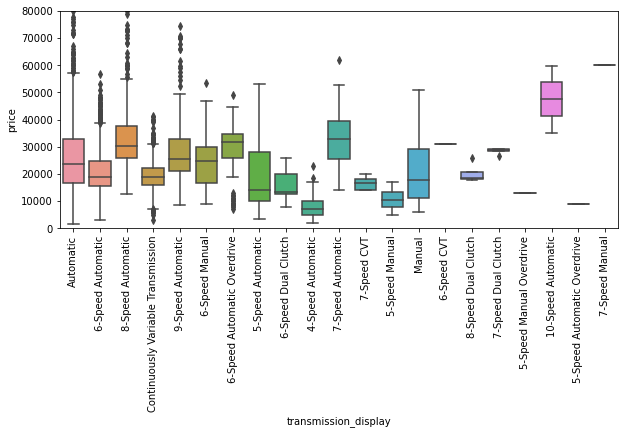

In [45]:
plt.figure(figsize=(10,4))
sns.boxplot(x="transmission_display",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Mean and range seem both to be varying, might be valuable column to predict price, check value counts:

In [46]:
data.transmission_display.value_counts().head()

Automatic                             2277
6-Speed Automatic                     1303
Continuously Variable Transmission     965
8-Speed Automatic                      679
9-Speed Automatic                      284
Name: transmission_display, dtype: int64

Convert anything with under 100 observations into other:

[]

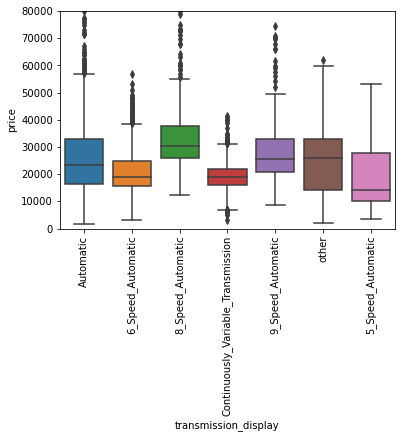

In [47]:
data_2['transmission_display'] = o_data['transmission_display'].apply(lambda x: 'Automatic' if x == 'Automatic' else 
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          'Continuously_Variable_Transmission' if x == 'Continuously Variable Transmission' else
                                                          '8_Speed_Automatic' if x == '8-Speed Automatic' else
                                                          '9_Speed_Automatic' if x == '9-Speed Automatic' else
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          '5_Speed_Automatic' if x == '5-Speed Automatic' else
                                                          'other')
plt.figure(figsize=(6,4))
sns.boxplot(x="transmission_display",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Looks relevant, change in mean and besides 2 relatively small range -> convert into dummies

In [48]:
# turn those columns into dummies
data_2 = pd.get_dummies(data_2, columns=['transmission_display'], drop_first=True)

#### franchise_make

[]

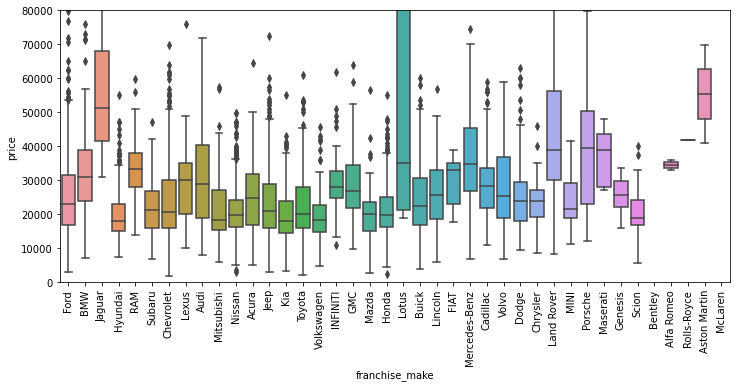

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(x="franchise_make",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

This seems to be too many columns to just turn into dummies, and as brand is strongly connected to price this seems an important column to keep -> divide brands into groups depending on their mean price, and label encode these groups.

In [50]:
# look at mean price by group
brand_mean_price=data.groupby('franchise_make', as_index=False)['price'].mean()
brand_mean_price=brand_mean_price.sort_values(by=['price'])
brand_mean_price.head()

,franchise_make,price
20,Kia,20001.936275
16,Hyundai,20064.829268
27,Mazda,20135.692857
38,Volkswagen,20160.651007
35,Scion,20897.826087


In [51]:
# sort the brands into groups with similar means
group_0 = brand_mean_price.iloc[0:8,0]
group_1 = brand_mean_price.iloc[8:14,0]
group_2 = brand_mean_price.iloc[14:19,0]
group_3 = brand_mean_price.iloc[19:25,0]
group_4 = brand_mean_price.iloc[25:34,0]
group_5 = brand_mean_price.iloc[34:38,0]
group_6 = brand_mean_price.iloc[38:40,0]

# write function to get names
def get_names (group):
    final = []
    for i in range(0,len(group)):
        name = group.iloc[i]
        final.append(name)
    return(final)
# list of names in each group
names_0 = get_names(group_0)
names_1 = get_names(group_1)
names_2 = get_names(group_2)
names_3 = get_names(group_3)
names_4 = get_names(group_4)
names_5 = get_names(group_5)
names_6 = get_names(group_6)

# replace each object with a number of their group
data_2['franchise_make'] = o_data['franchise_make'].apply(lambda x: 0 if x in names_0 else
                                                          1 if x in names_1 else
                                                          2 if x in names_2 else
                                                          3 if x in names_3 else
                                                          4 if x in names_4 else
                                                          5 if x in names_5 else
                                                          6 if x in names_6 else
                                                         'wrong')

#### make_name

In [52]:
data.make_name.value_counts().head()

Ford         824
Chevrolet    575
Toyota       523
Nissan       489
Honda        475
Name: make_name, dtype: int64

Has the same information as franchise_make, can be dropped.

In [53]:
data_2 = data_2.drop(columns=["make_name"], axis = 1)

#### listed_date

In [54]:
data.listed_date.value_counts().head()

2020-09-02    207
2020-08-28    157
2020-09-03    153
2020-08-26    145
2020-08-27    144
Name: listed_date, dtype: int64

In [55]:
#simply turn into numerical
import datetime
data_2['listed_date']=pd.to_datetime(data_2["listed_date"]).dt.strftime("%Y%m%d")
data_2['listed_date']=data_2.listed_date.astype(int)
# get correlation
data_2['listed_date'].corr(data_2['price'])

-0.12547087176248412

Has a negative correlation between listing date and price, rather small

#### model_name

In [56]:
data.model_name.value_counts().head()

F-150             187
Escape            166
Rogue             146
Silverado 1500    136
Accord            125
Name: model_name, dtype: int64

Looking at both head and tail, there is a good distribution of the different model names, not one that is prelevant wherease the rest only has 1 or 2 entries -> group and turn into numeric

In [57]:
# look at grouped mean
make_mean_price=data.groupby('model_name', as_index=False)['price'].mean()
make_mean_price=make_mean_price.sort_values(by=['price'])
make_mean_price.head()

,model_name,price
240,QX4,2000.0
202,Mariner Hybrid,2953.0
116,Explorer Sport Trac,2995.0
224,Park Avenue,3000.0
124,Five Hundred,3000.0


In [58]:
# like with other column, divide 361 rows into 7 groups, different sizes but around same mean
group_0 = make_mean_price.iloc[0:100,0] # 2000-15000
group_1 = make_mean_price.iloc[100:194,0] # 15000-25000 
group_2 = make_mean_price.iloc[194:237,0] # 25000-30000 
group_3 = make_mean_price.iloc[237:279,0] # 30000-35000
group_4 = make_mean_price.iloc[279:329,0] # 35000-50000
group_5 = make_mean_price.iloc[319:352,0] # 50000-10000
group_6 = make_mean_price.iloc[352:362,0] # rest

# list of names in each group
names_0 = get_names(group_0)
names_1 = get_names(group_1)
names_2 = get_names(group_2)
names_3 = get_names(group_3)
names_4 = get_names(group_4)
names_5 = get_names(group_5)
names_6 = get_names(group_6)

# replace each object with a number of their group
data_2['model_name'] = o_data['model_name'].apply(lambda x: 0 if x in names_0 else
                                                          1 if x in names_1 else
                                                          2 if x in names_2 else
                                                          3 if x in names_3 else
                                                          4 if x in names_4 else
                                                          5 if x in names_5 else
                                                          6 if x in names_6 else
                                                         'wrong')

#### interior_color

In [59]:
data.interior_color.value_counts().head()

Black               1664
None                 723
Jet Black            369
Gray                 286
Black (Charcoal)     261
Name: interior_color, dtype: int64

extremely specific column, almost 700 different unique values where colour was described detailed(5 most common are 3 dif descriptions of black), hard to group and won't be a useful predictor, as this closely described color is very specific, and a interested buyer would probably describe colour differently than written in data -> drop column

In [60]:
data_2 = data_2.drop(columns=["interior_color"], axis = 1)

#### exterior_color

In [61]:
data_2.exterior_color.value_counts().head()

Black           307
White           212
Gray            142
Summit White    139
Silver          126
Name: exterior_color, dtype: int64

Same problem as interior, but over 1000 unique values, extemely specific descriptons, useless, drop

In [62]:
data_2 = data_2.drop(columns=["exterior_color"], axis = 1)

#### Trim: trim_name & trimID

As the two represent the same thing, we can drop trim_name which is harder to organize

In [63]:
data_2 = data_2.drop(columns=["trim_name"], axis = 1)

In [64]:
data.trimId.head()

0    t66989
1    t67141
2    t55391
3    t73244
4    t83299
Name: trimId, dtype: object

In [65]:
# drop first letter of each row
data_2['trimId'] = data['trimId'].str.slice(1)
# convert to integer
data_2['trimId']=data_2.trimId.astype(int)
# look at correlation
data_2['trimId'].corr(data_2['price'])

0.29918357172730936

Positive correlation between trimID and price visible -> coud be a useful predictor

#### city

In [66]:
data['city'].value_counts().head()

Houston         78
San Antonio     51
Columbus        43
Tampa           32
Indianapolis    31
Name: city, dtype: int64

Has over 1700 unique values, which are distributed relatively evenyl (not one city taking majortiy and the rest 1 or 2), making it hard to analyze initially.

[]

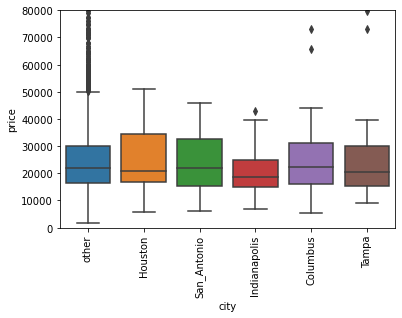

In [67]:
# prelimiary selection of city's that come up more than 20 times for easier visualization
data_2['city'] = o_data['city'].apply(lambda x: 'Houston' if x == 'Houston' else 
                                                          'San_Antonio' if x == 'San Antonio' else
                                                          'Columbus' if x == 'Columbus' else
                                                          'Tampa' if x == 'Tampa' else
                                                          'Indianapolis' if x == 'Indianapolis' else
                                                          'other')
plt.figure(figsize=(6,4))
sns.boxplot(x="city",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

From this graph, mean of price seems very unrelated of city, even other does not have a big range (just some outliers), does not look like a valuable predictor -> drop column

In [68]:
data_2 = data_2.drop(columns=["city"], axis = 1)

#### major_options

In [69]:
data.major_options.value_counts().head()

['Alloy Wheels', 'Bluetooth', 'Backup Camera']    311
['Steel Wheels', 'Bluetooth', 'Backup Camera']    101
['Alloy Wheels']                                   75
['Alloy Wheels', 'Bluetooth']                      69
['Steel Wheels']                                   66
Name: major_options, dtype: int64

almost 3000 unique values, each packed in list, drop or unpack list but that will make a lot of new columns don't think it's worth the work considering we have a lot of columns

In [70]:
data_2 = data_2.drop(columns=["major_options"], axis = 1)

#### sp_name

In [71]:
data.sp_name.value_counts().head()

Honda of Fort Myers                     7
Planet Subaru                           6
Simmons Rockwell Chevrolet Buick GMC    6
Elder Ford of Tampa                     6
ALM Kia South                           6
Name: sp_name, dtype: int64

This information should be represented in franchise_make -> drop the column

In [72]:
data_2 = data_2.drop(columns=["sp_name"], axis = 1)

In [73]:
# drop categorical version of columns we have numerical copy of
data_2 = data_2.drop(columns=["transmission","wheel_system_display","fuel_type","wheel_system"], axis = 1)

In [74]:
data = data_2

In [75]:
data.dtypes

back_legroom                                               float64
city_fuel_economy                                          float64
daysonmarket                                                 int64
dealer_zip                                                   int64
engine_displacement                                        float64
fleet                                                        int64
frame_damaged                                                int64
franchise_make                                               int64
front_legroom                                              float64
fuel_tank_volume                                           float64
has_accidents                                                int64
height                                                     float64
highway_fuel_economy                                       float64
horsepower                                                 float64
isCab                                                        i

In [76]:
data.shape

(6000, 59)

everything is in numerical form, we still have 6000 rows and now 59 columns

In [78]:
final_corrs = pd.DataFrame(data.corrwith(data.price)).reset_index().sort_values(by = 0, ascending = False)

final_corr_cols = list(final_corrs.loc[(final_corrs[0] >= 0.2) | (final_corrs[0] <= -0.2)][1:]['index'])
final_corrs.loc[(final_corrs[0] >= 0.2) | (final_corrs[0] <= -0.2)][1:]

,index,0
22,model_name,0.582557
13,horsepower,0.536780
24,power,0.517518
31,torque,0.513047
4,engine_displacement,0.359656
9,fuel_tank_volume,0.349802
51,engine_cylinders_V8,0.309665
33,wheelbase,0.303458
32,trimId,0.299184
35,year,0.292627


In [79]:
final_dat = data.copy()

for col in final_dat:
    if col not in final_corr_cols:
        final_dat.drop(col, axis = 1, inplace = True)

final_dat.shape

(6000, 20)

We have 20 predictors which have a reasonable correlation with price which we will be the only predictors we use in our model building. 

When we develop our models, we will print the feature importances and note which features are deemed significant by each model. 

In [ ]:
# original data had -- for this observation so we can just drop it.
final_dat.isna().sum()
final_dat.iloc[29]
final_dat.drop(29, inplace = True)
y.drop(29, inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_dat, y, test_size = 0.3, random_state = 4)

# Please all use the same random_state = 4 in ALL model development so we can be consistent and reproduce results

### and use the same data split as above